In [1]:
import csv
dataset_extended = {'relax': {'x':[], 'y':[]},
                    'cognit':{'x':[], 'y':[]},
                    'emotio':{'x':[], 'y':[]}}

for variable_name in ['relax', 'cognit', 'emotio']:
    with open('training_samples_'+variable_name+'.csv', newline='\n') as csvfile:
        reader_f = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in reader_f:
            dataset_extended[variable_name]['x'].append(row)
            dataset_extended[variable_name]['y'].append([variable_name])

In [2]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
dataset_splitted = {'relax': {'x_train':[], 'x_test':[], 'y_train':[], 'y_test':[]},
                    'cognit':{'x_train':[], 'x_test':[], 'y_train':[], 'y_test':[]},
                    'emotio':{'x_train':[], 'x_test':[], 'y_train':[], 'y_test':[]}}

for name in ['relax', 'cognit', 'emotio']:
    x_train, x_test, y_train, y_test = train_test_split(dataset_extended[name]['x'], dataset_extended[name]['y'], random_state = 0)
    dataset_splitted[name]['x_train'] = x_train
    dataset_splitted[name]['x_test'] = x_test
    dataset_splitted[name]['y_train'] = y_train
    dataset_splitted[name]['y_test'] = y_test
    print(name,len(x_train),len(x_test),len(y_train),len(y_test))

relax 2250 750 2250 750
cognit 2250 750 2250 750
emotio 2250 750 2250 750


In [4]:
import numpy as np

x_train = []
x_test = []
y_train = []
y_test = []
for name in ['relax', 'cognit', 'emotio']:
    np.random.shuffle(dataset_splitted[name]['x_train'])
    x_train = x_train + dataset_splitted[name]['x_train']
    np.random.shuffle(dataset_splitted[name]['x_test'])
    x_test = x_test + dataset_splitted[name]['x_test']
    np.random.shuffle(dataset_splitted[name]['y_train'])
    y_train = y_train + dataset_splitted[name]['y_train']
    np.random.shuffle(dataset_splitted[name]['y_test'])
    y_test = y_test + dataset_splitted[name]['y_test']
print('Full:',len(x_train),len(x_test),len(y_train),len(y_test))

Full: 6750 2250 6750 2250


In [5]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

def train_tree(x_train, x_test, y_train, y_test):
    dtree_model = DecisionTreeClassifier(max_depth = 10).fit(x_train, y_train)
    dtree_predictions = dtree_model.predict(x_test)
    
    cm = confusion_matrix(y_test, dtree_predictions)
    accuracies = cm.diagonal()/cm.sum(axis=1)
    return dtree_model, accuracies

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
def find_tree(goal):
    attempts = 0
    accuracies = [0]
    dtree_model = None
    while(np.mean(accuracies) < goal):
        attempts += 1
        dtree_model, accuracies = train_tree(x_train, x_test, y_train, y_test)
        if (attempts%25==0):
            print('Attempts:',attempts)
    print('Total attempts:',attempts)
    
    # Print accuracies
    for acc, class_name in zip(accuracies,['relax', 'cognit', 'emotio']):
        print('Accuracy for class {} is {:0.2f}%'.format(class_name,acc))
    # Print confusion matrix
    plot_confusion_matrix(dtree_model, x_test, y_test)
    plt.show();
    return dtree_model

Total attempts: 19
Accuracy for class relax is 0.66%
Accuracy for class cognit is 0.61%
Accuracy for class emotio is 0.80%


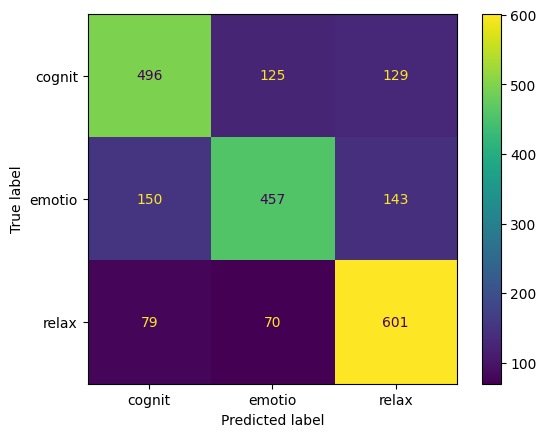

In [16]:
dtree_model = find_tree(0.69)

In [18]:
import pickle
filename = 'finalized_model_tree.sav'
pickle.dump(dtree_model, open(filename, 'wb'))